## 8.1 API Funcional
### Deep Learning, Introducción práctica con Keras - Segunda parte

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook state.

TensorFlow 2.x selected.



Modelo base:



In [3]:

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model_base = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_base.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Modelo con la *functional API* de Keras:


In [0]:
from tensorflow import keras

inputs  = keras.Input(shape=(784,))

In [5]:
inputs.shape

TensorShape([None, 784])

In [6]:
inputs.dtype

tf.float32

In [0]:
from tensorflow.keras import layers

dense1  = layers.Dense(64, activation='relu')(inputs)

In [0]:
dense2  = layers.Dense(64, activation='relu')(dense1)
outputs = layers.Dense(10, activation='softmax')(dense2)

In [0]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Resumen del modelo:

In [0]:
inputs  = keras.Input(shape=(784,))
dense1  = layers.Dense(64, activation='relu')(inputs)
dense2  = layers.Dense(64, activation='relu')(dense1)
outputs = layers.Dense(10, activation='softmax')(dense2)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [0]:
model.summary()

In [0]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [0]:
model.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)


Diferentes opciones de uso de la API


In [0]:
def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

ensemble_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
model (Model)                   (None, 1)            129         input_5[0][0]                    
__________________________________________________________________________________________________
model_1 (Model)                 (None, 1)            129         input_5[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1)            129         input_5[0][0]                    
____________________________________________________________________________________________

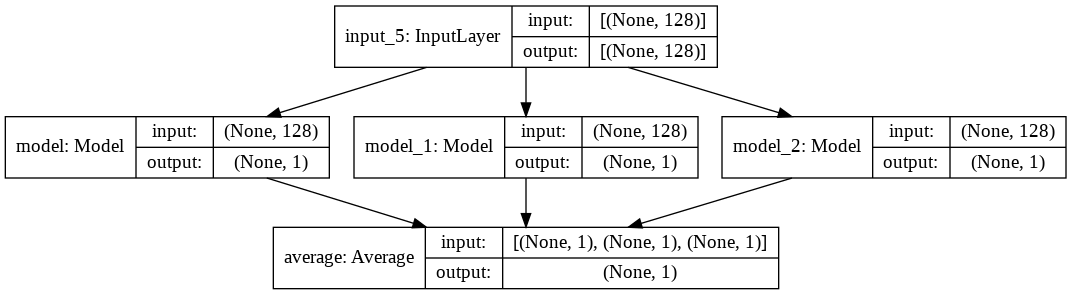

In [0]:
keras.utils.plot_model(ensemble_model, show_shapes=True)

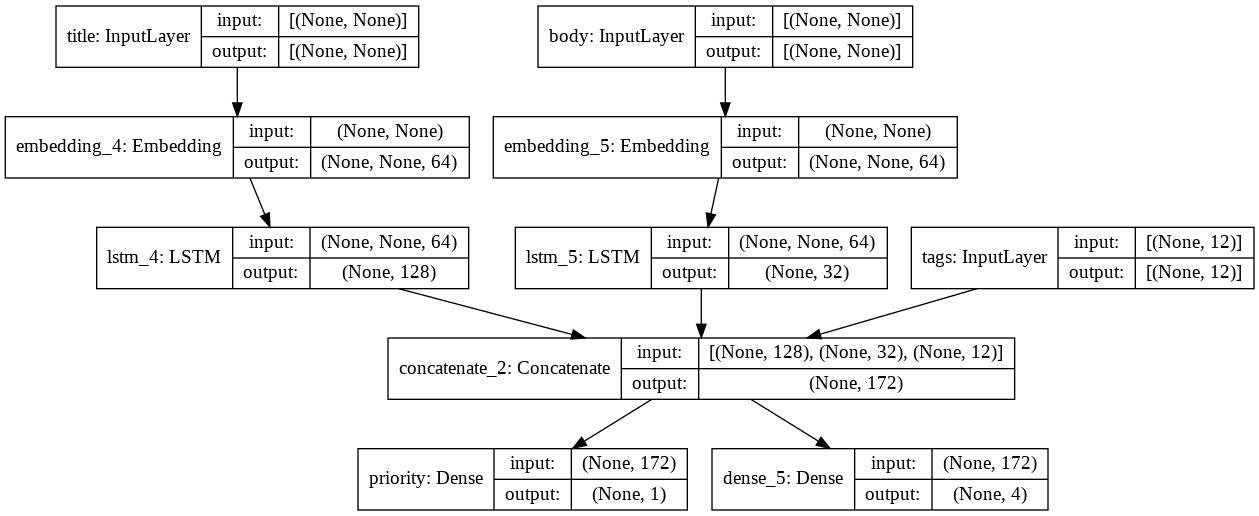

In [0]:
num_tags = 12  
num_words = 10000  
num_departments = 4  

title_input = keras.Input(shape=(None,), name='title') 
body_input = keras.Input(shape=(None,), name='body')  
tags_input = keras.Input(shape=(num_tags,), name='tags')  

title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)

title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)

x = layers.concatenate([title_features, body_features, tags_input])

priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
department_pred = layers.Dense(num_departments, activation='softmax')(x)

model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

keras.utils.plot_model(model, show_shapes=True)
